<a href="https://colab.research.google.com/github/Beyzanurekerr/Data_Analysis_Project/blob/main/Proje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC


In [ ]:
# 1. Veri Setini Yükleme
datas = pd.read_csv("/content/dataset.csv")
datas = datas.dropna() #Eksik verileri temizleme

#seçilen özellikler
selected_features = [
    "Mother's qualification",
    "Father's qualification",
    "Age at enrollment",
    "Gender",
    "Scholarship holder",
    "Daytime/evening attendance",
    "Tuition fees up to date",
    "Unemployment rate",
    "Inflation rate"
]

# 2. Seçilen özelliklerin olup olmadığını kontrol etme
for feature in selected_features:
    if feature not in datas.columns:
        print(f"UYARI: '{feature}' özelliği veri setinde bulunamadı ve işleme alınmadı.")

# Sadece veri setinde bulunan özellikler
existing_features = [feature for feature in selected_features if feature in datas.columns]
dms = pd.get_dummies(datas[existing_features])

# Bağımlı ve Bağımsız Değişkenleri Belirleme
if "Target" not in datas.columns:
    raise ValueError("'Target' özelliği veri setinde bulunamadı.")
y = datas["Target"]  # Bağımlı değişken
x_ = datas.drop(["Target"] + selected_features, axis=1).select_dtypes(include=['float64', 'int64'])
x = pd.concat([x_, dms], axis=1)

# Eğitim ve Test Verisine Ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
SVC_model = SVC()
params = {
    "C": [0.1, 1, 10, 100],
    "gamma": ['scale', 'auto'],
    "kernel": ['linear', 'rbf', 'poly'],
}
SVC_cv = GridSearchCV(SVC_model, params, cv=3, n_jobs=-1, verbose=2)
SVC_cv.fit(X_train_scaled, y_train_encoded)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [ ]:
# En iyi parametrelerle modelin doğruluğunu değerlendirme
print(f"En iyi parametreler: {SVC_cv.best_params_}")
best_model = SVC_cv.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model doğruluğu: {accuracy:.4f}")

En iyi parametreler: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Model doğruluğu: 0.7571



------------------------------------------

Bağımsız değişkenlerin önem sıralaması



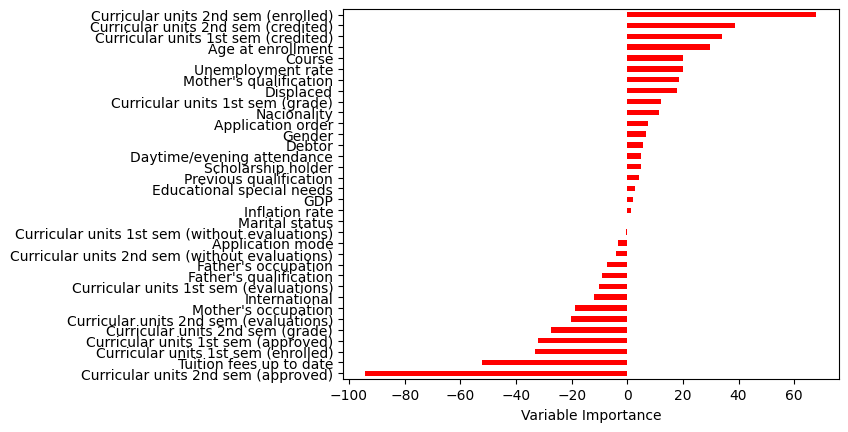

In [ ]:
print("\n------------------------------------------\n")
print("Bağımsız değişkenlerin önem sıralaması\n")
try:
    importance = pd.DataFrame({"Importance": best_model.coef_[0] * 100}, index=X_train.columns)
    importance = importance.sort_values(by="Importance", ascending=True)
    importance.plot(kind="barh", color="r")
    plt.xlabel("Variable Importance")
    plt.gca().legend_ = None
    plt.show()
except AttributeError:
    print("SVC modelinin özelliği olmadığı için 'feature_importances_' veya 'coef_' kullanılamaz.")




Histogram grafiği



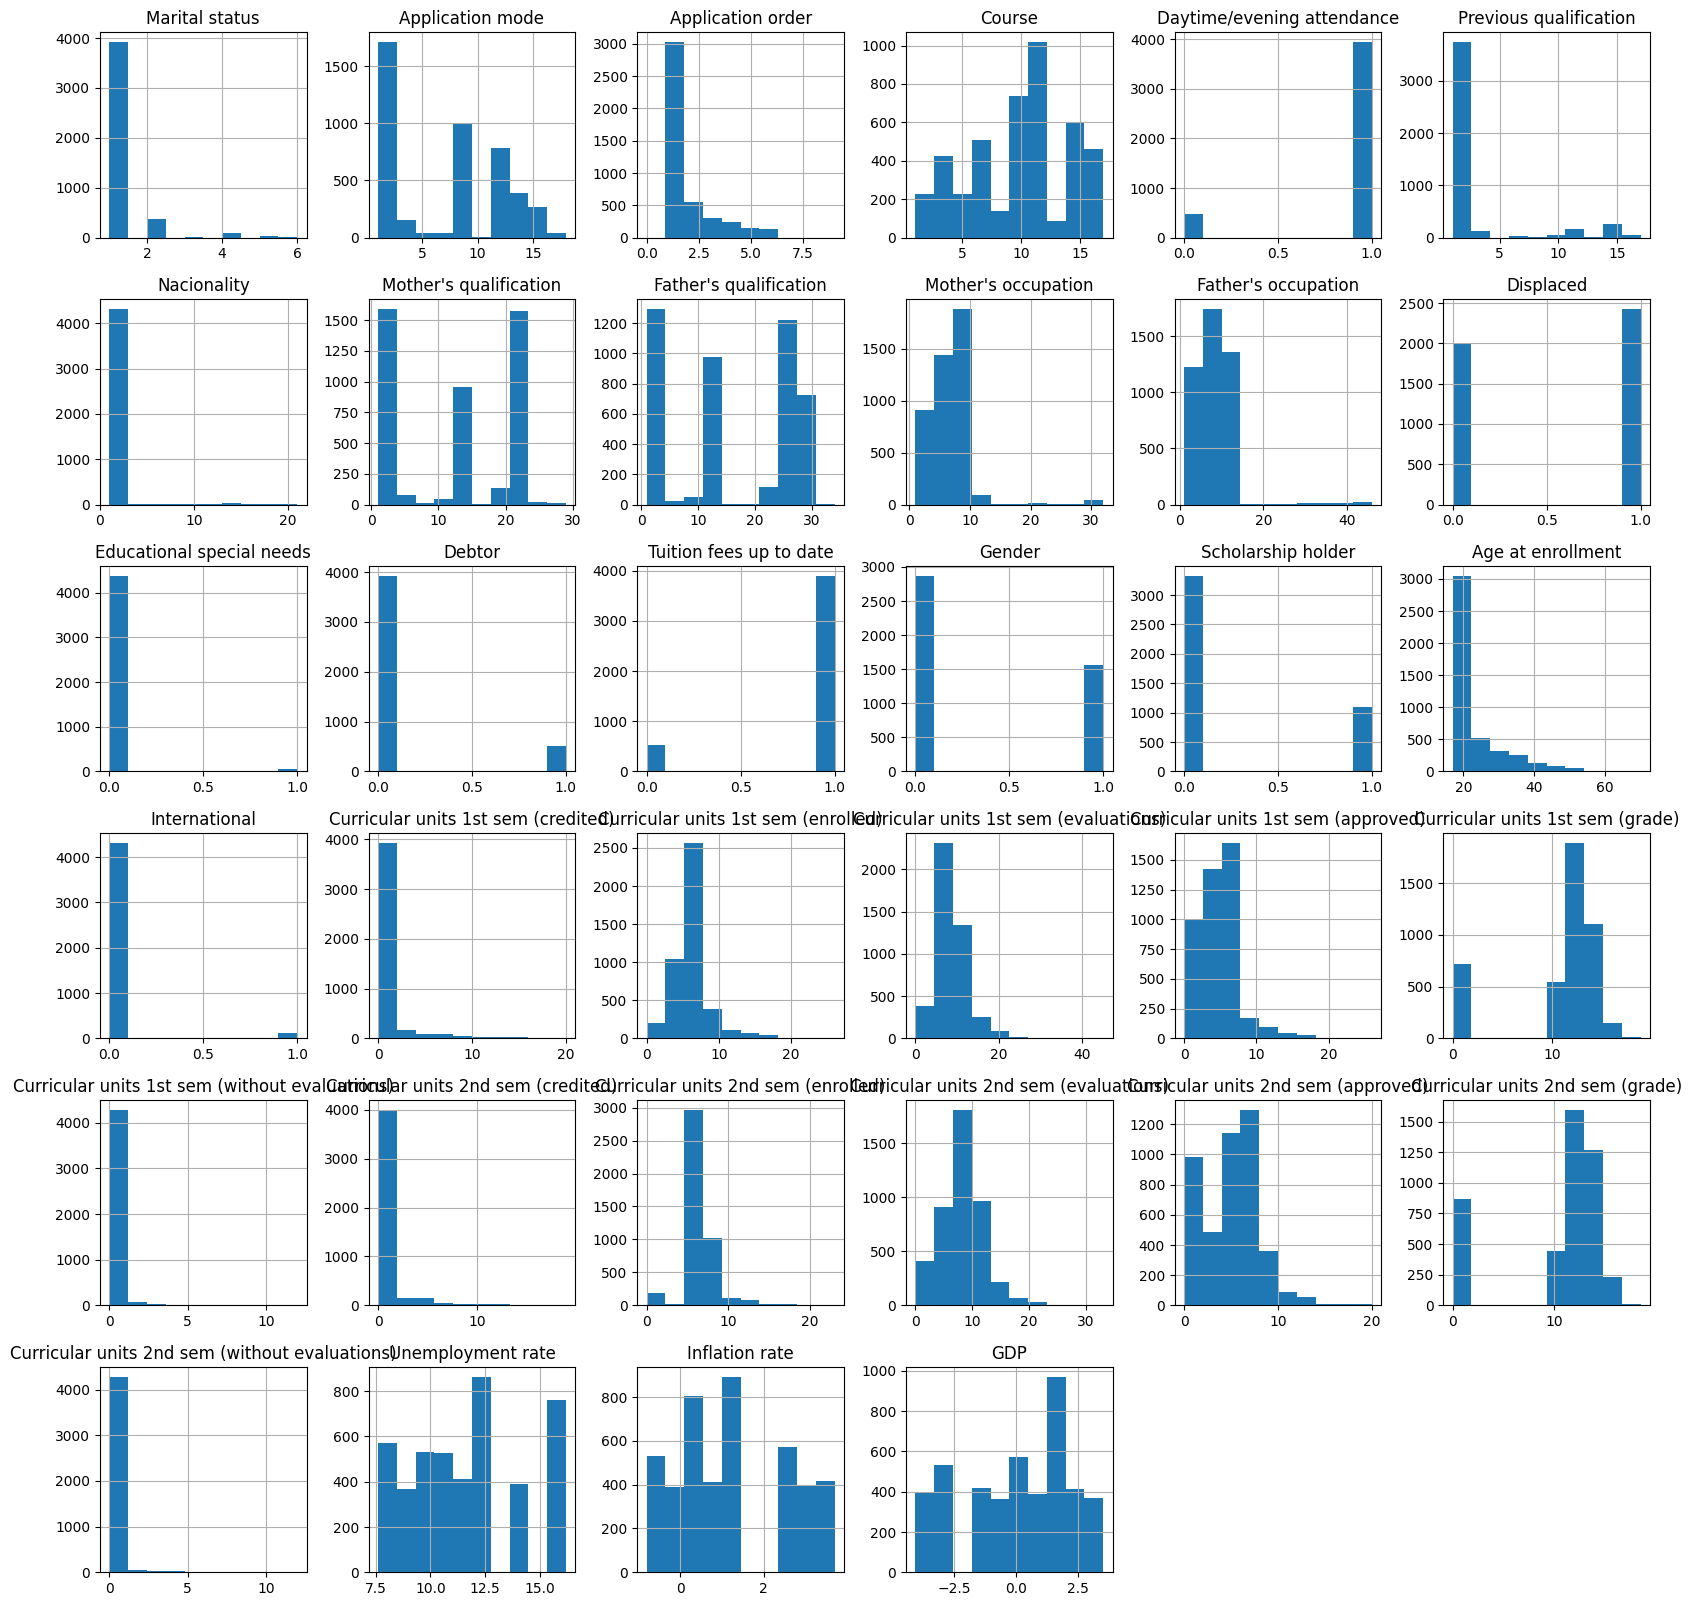

In [ ]:
# Histogram Grafiği
print("\n\nHistogram grafiği\n")
datas.hist(figsize=(20,20))
plt.show()


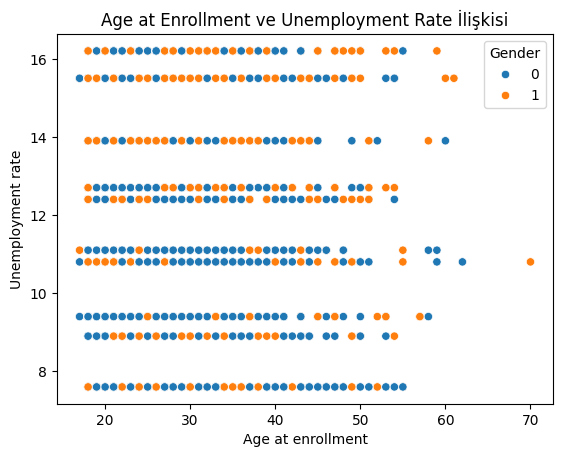

In [ ]:
# Age at Enrollment ve Unemployment Rate grafiği
sns.scatterplot(data=datas, x="Age at enrollment", y="Unemployment rate", hue="Gender")
plt.title("Age at Enrollment ve Unemployment Rate İlişkisi")
plt.show()
